In [1]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, hinge_loss, precision_score, recall_score )
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the preprocessed_crimes_data.csv file
data_selected = pd.read_csv('preprocessed_crimes_data.csv')

data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
5,2223711,2018.0,-87.671447,41.842264,160,34,360
6,7618,2018.0,-87.671447,41.842264,160,9,232
7,778818,2018.0,-87.671447,41.842264,160,9,232
8,276626,2015.0,-87.671447,41.842264,140,9,232
9,1084232,2012.0,-87.671447,41.842264,189,9,232


In [3]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'}, inplace=True)

data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23,9,232
1,3188902,2018.0,-87.671447,41.842264,17,9,231
2,1048858,2016.0,-87.671447,41.842264,189,9,232
3,3188928,2018.0,-87.671447,41.842264,160,26,470
4,1338751,2014.0,-87.671447,41.842264,160,9,232
5,2223711,2018.0,-87.671447,41.842264,160,34,360
6,7618,2018.0,-87.671447,41.842264,160,9,232
7,778818,2018.0,-87.671447,41.842264,160,9,232
8,276626,2015.0,-87.671447,41.842264,140,9,232
9,1084232,2012.0,-87.671447,41.842264,189,9,232


In [4]:
# Split the dataset into features and tagert
X = data_selected.drop('Crime_Type', axis=1)
y = data_selected['Crime_Type']

# Split the data into training and temporary (validation and testing) sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the remaining data into validation and testing sets.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)


In [5]:
# Implementing Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Model Fitting
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [6]:
# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')


Validation Accuracy: 74.58%
Test Accuracy: 74.54%


In [7]:
#validation data classification report
y_pred = rf_model.predict(X_val)

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report of validation dataset:")
print(class_report)

Classification Report of validation dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2752
           1       0.65      0.03      0.06    104373
           2       0.60      0.97      0.75    290987
           3       0.94      0.83      0.88     85657
           4       0.00      0.00      0.00       220
           5       0.00      0.00      0.00      5547
           6       0.94      0.96      0.95    181291
           7       0.00      0.00      0.00      1576
           8       1.00      0.76      0.86     43262
           9       0.78      0.39      0.53     71180
          11       0.00      0.00      0.00      2872
          12       0.00      0.00      0.00      2652
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00      3776
          15       0.00      0.00      0.00       999
          16       1.00      0.12      0.21      1491
          17       0.00      0.00   

In [8]:
#test data classification report
y_pred = rf_model.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report of Test Dataset:")
print(class_report)


Classification Report of Test Dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1281
           1       0.64      0.03      0.06     51657
           2       0.60      0.97      0.75    143368
           3       0.95      0.83      0.89     42516
           4       0.00      0.00      0.00       103
           5       0.00      0.00      0.00      2775
           6       0.94      0.96      0.95     89570
           7       0.00      0.00      0.00       752
           8       1.00      0.76      0.86     21757
           9       0.78      0.39      0.52     34693
          11       0.00      0.00      0.00      1504
          12       0.00      0.00      0.00      1255
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00      1860
          15       0.00      0.00      0.00       451
          16       1.00      0.13      0.22       719
          17       0.00      0.00      0.0

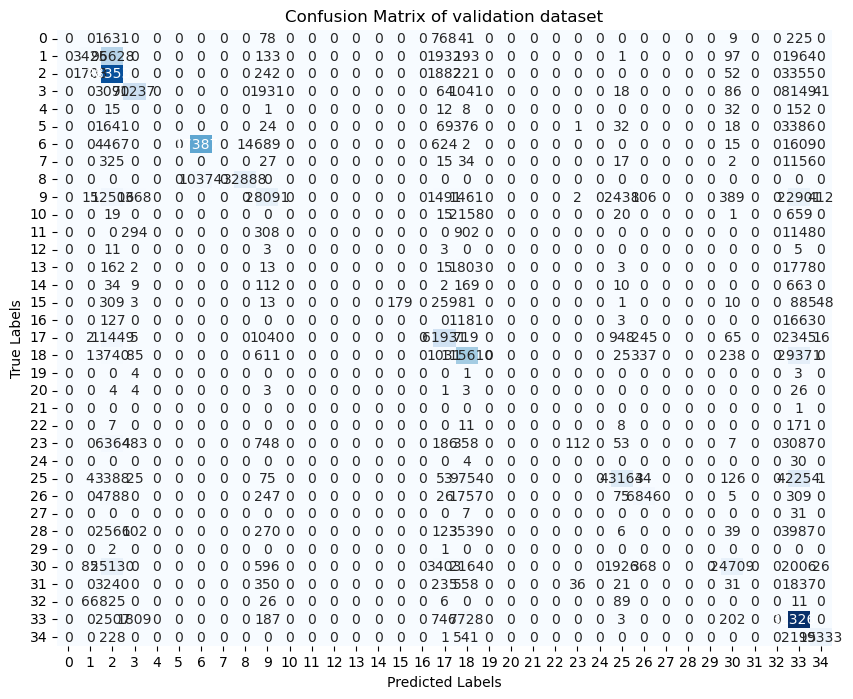

In [9]:
#confusion matrix for validation set
y_pred = rf_model.predict(X_val)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of validation dataset')
plt.show()


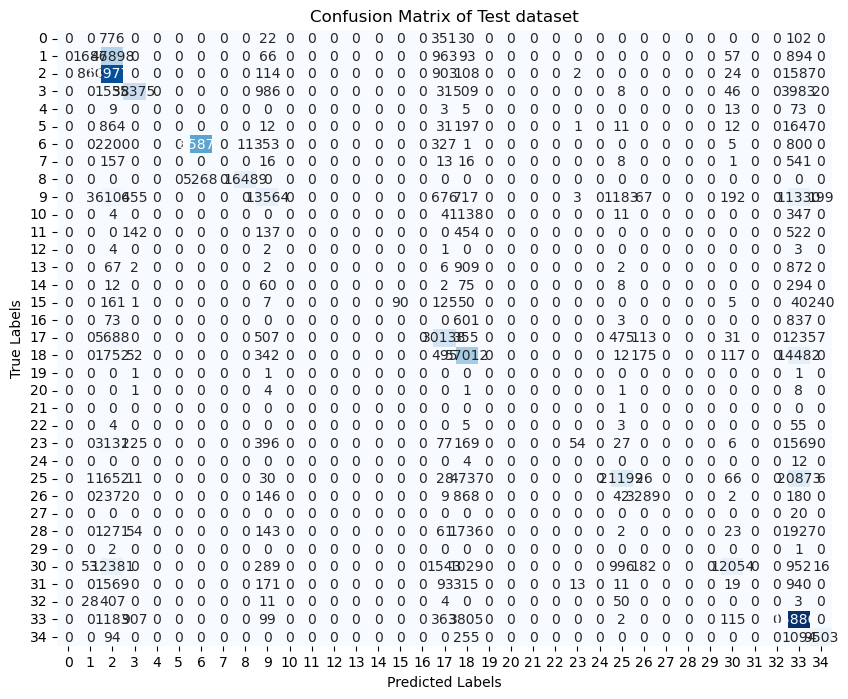

In [10]:
#confusion matrix for test set
y_pred = rf_model.predict(X_test)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Test dataset')
plt.show()

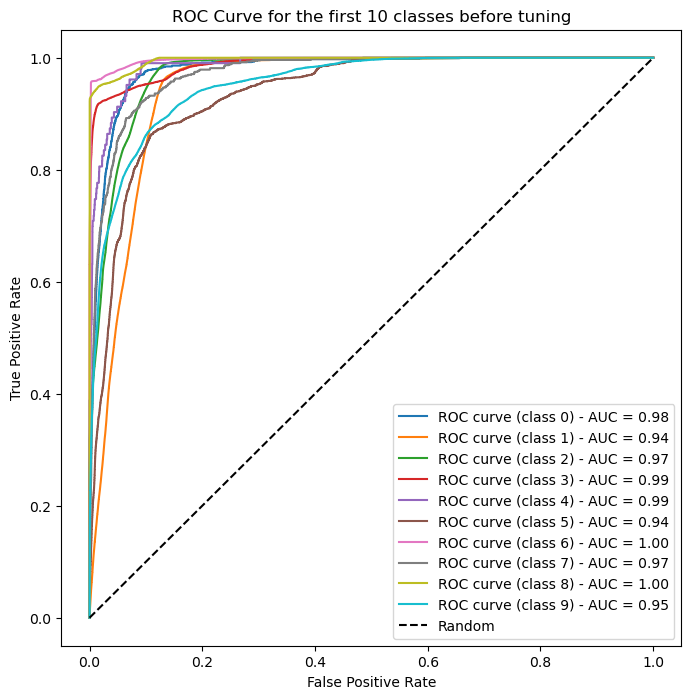

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf_model.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes before tuning')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,  # Adjust the number of iterations as needed
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_rf_model_random = random_search.best_estimator_

print("Best Hyperparameters (Random Search) for Random Forest:", best_params_random)


In [5]:
# Implementing Random Forest model with best parameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None
)

# Model Fitting
rf_model_tuned.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

In [6]:
# Evaluate the model on the validation set
y_val_pred = rf_model_tuned.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test set
y_test_pred = rf_model_tuned.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')


Validation Accuracy: 92.96%
Test Accuracy: 92.98%


In [8]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the validation set
y_val_pred = rf_model_tuned.predict(X_val)

# Calculate accuracy and F1 score on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f'Validation Accuracy of Hyper parameter Model: {accuracy * 100:.2f}%')
print(f'Validation F1 Score of Hyper parameter Model: {f1 * 100:.2f}%')

# Evaluate the model on the test set
y_test_pred = rf_model_tuned.predict(X_test)

# Calculate accuracy and F1 score on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f'Test Accuracy of Hyper parameter Model: {accuracy_test * 100:.2f}%')
print(f'Test F1 Score of Hyper parameter Model: {f1_test * 100:.2f}%')

Validation Accuracy of Hyper parameter Model: 92.96%
Validation F1 Score of Hyper parameter Model: 92.74%
Test Accuracy of Hyper parameter Model: 92.98%
Test F1 Score of Hyper parameter Model: 92.76%


In [9]:
#validation data classification report
y_pred = rf_model_tuned.predict(X_val)

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report of Validation dataset of Hyper parameter Model:")
print(class_report)

Classification Report of Validation dataset of Hyper parameter Model:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      2752
           1       0.56      0.47      0.51    104373
           2       0.82      0.87      0.84    290987
           3       0.99      1.00      1.00     85657
           4       0.94      0.62      0.75       220
           5       0.90      0.75      0.82      5547
           6       0.98      1.00      0.99    181291
           7       0.82      0.57      0.67      1576
           8       1.00      0.93      0.96     43262
           9       0.97      0.98      0.98     71180
          11       0.97      0.92      0.95      2872
          12       0.97      0.97      0.97      2652
          13       1.00      0.09      0.17        22
          14       0.93      0.82      0.87      3776
          15       0.85      0.44      0.58       999
          16       0.91      0.68      0.78      1491
          1

In [10]:
#test data classification report
y_pred = rf_model_tuned.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report of Test dataset of Hyper parameter Model:")
print(class_report)


Classification Report of Test dataset of Hyper parameter Model:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1281
           1       0.57      0.48      0.52     51657
           2       0.82      0.87      0.84    143368
           3       0.99      1.00      0.99     42516
           4       0.88      0.56      0.69       103
           5       0.89      0.74      0.81      2775
           6       0.98      1.00      0.99     89570
           7       0.81      0.54      0.65       752
           8       1.00      0.93      0.96     21757
           9       0.97      0.98      0.98     34693
          11       0.97      0.92      0.94      1504
          12       0.97      0.97      0.97      1255
          13       0.00      0.00      0.00        10
          14       0.93      0.81      0.87      1860
          15       0.83      0.44      0.57       451
          16       0.91      0.69      0.78       719
          17     

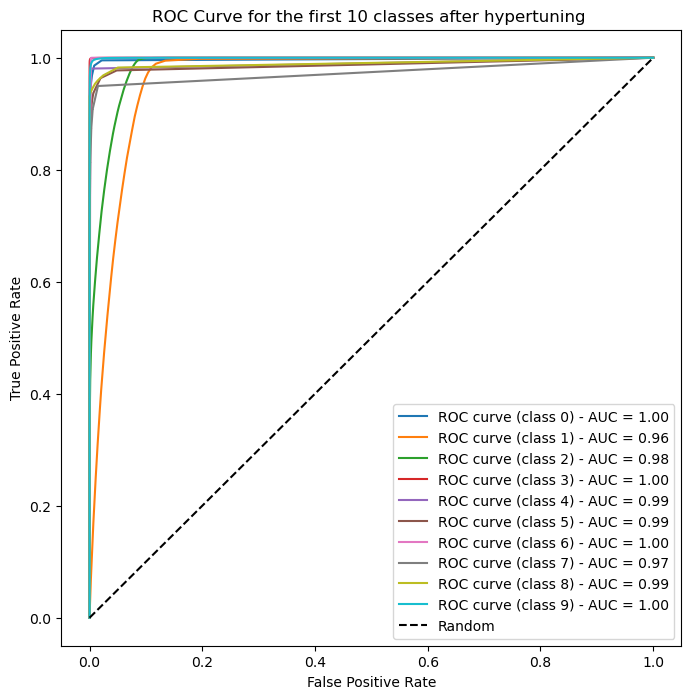

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf_model_tuned.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes after hypertuning ')
plt.legend(loc='best')
plt.show()

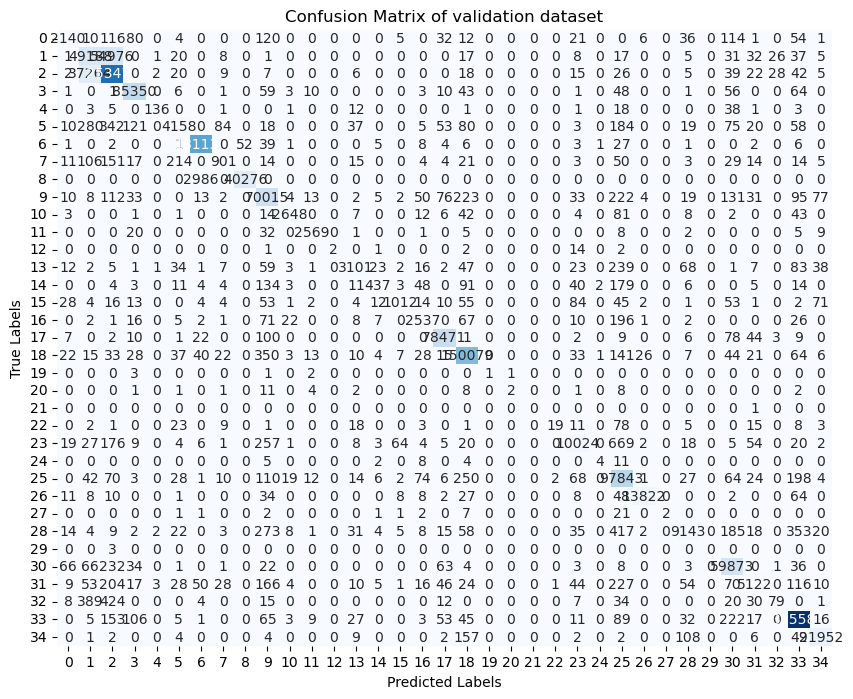

In [12]:
#confusion matrix for validation set
y_pred = rf_model_tuned.predict(X_val)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of validation dataset')
plt.show()


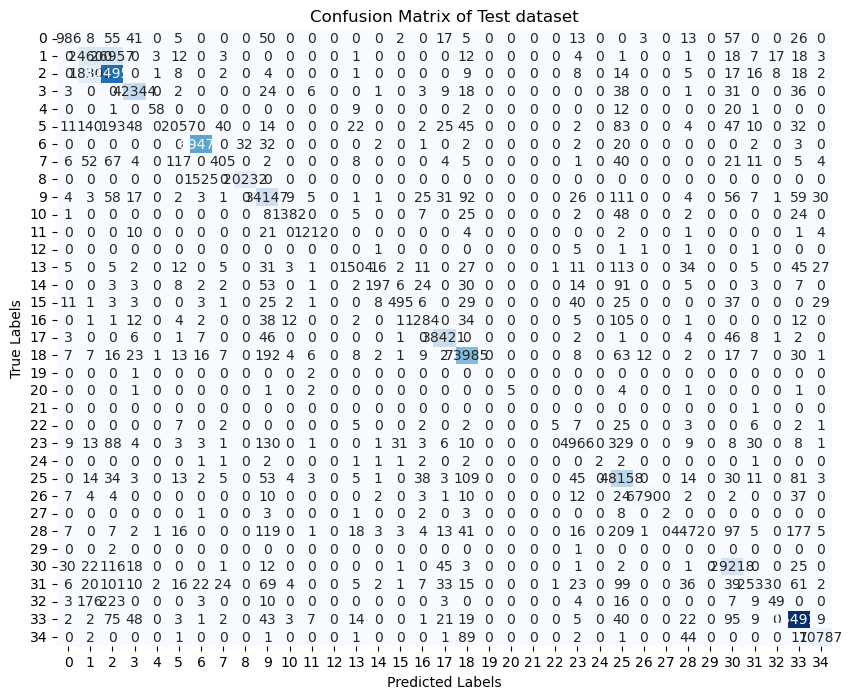

In [13]:
#confusion matrix for test set
y_pred = rf_model_tuned.predict(X_test)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Test dataset')
plt.show()